In [2]:
from __future__ import print_function
__author__= 'kk3374'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
myMean = 600

# Central Limit Theorem
A definition of Central Limit Theorem as stated in FB email, '3 Clarifications from today's class':
"The distribution of a sample drawn from a parent distribution will look increasingly more like the parent 
distribution as the size of the sample increases. The distribution of the means of N samples generated from the 
parent distribution will be normally distributed (Gaussian), have a mean equal to the parent distribution and
its standard deviation will be equal to the parent population standard deviation divided by the square root of
the sammple size. 

# Law of Large Numbers
For this assignment, we are to explain the plot of each distribution's sample mean against the sample size in terms
of the Law of Large Numbers. The Law of Large Numbers states that 'the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed.' https://en.wikipedia.org/wiki/Law_of_large_numbers. In addition to plotting each of the distributions as histograms, I chose to plot them all as scatter plots. The scatter plots visually demonstrate the concept explained by the Law of Large numbers. As the number of samples increases, the mean of those samples is closer to the expected mean of 600. Each plot, regardless of its distributional characteristics, follows a funnel-like shape, with the range of means for a smaller number of samples being larger, ultimately narrowing to the true mean as the number of samples increased. 

[597.83263863761272, 599.9817881678307, 598.72861203756463, 599.613786536107, 599.57827973429517, 599.25921769566912, 598.86901852277447, 599.94193353224159, 600.11752541360147, 600.05460072156461, 599.40016747987318, 600.27868394920995, 599.9440963516364, 600.62534680089288, 599.99534090482211, 599.97994287038773, 599.98361537171706, 599.81815482571687, 600.07220995705154, 599.83942851387371, 599.32322115810393, 600.32894887457121, 599.90873860672036, 600.03167918177598, 600.21133050823732, 599.69978550630617, 599.96300073551504, 600.22417899809363, 599.69277519829905, 599.82838739495674, 600.05517793365323, 600.03189343987765, 600.01600616181372, 599.87931770641342, 599.69861460966877, 600.06303883596752, 599.92116821495995, 600.07525929981352, 599.76312906964733, 600.1431782667363, 599.99167266970346, 600.0214465262336, 599.94861387241167, 599.80337847845692, 599.55116481854463, 599.83777631109444, 600.20847333449274, 600.08442237780571, 599.99911556808058, 599.68271448596784, 599.8

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


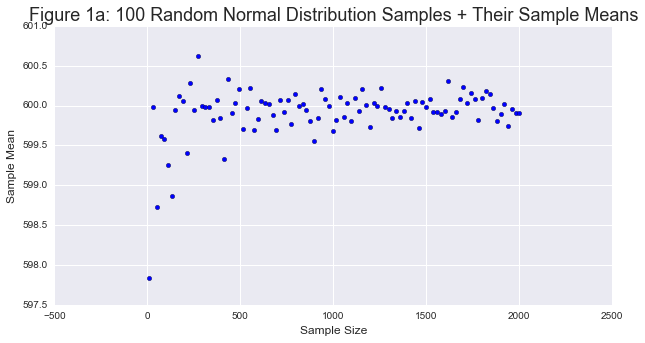

In [11]:
#Normal Distribution
#np.random.seed(300)
loc = myMean
#create a function which returns the mean of each randomly generated normal distribution
def create_norm_size(loc, s):
    return np.random.normal(loc, scale = 5, size = s).mean()

listOfNormal = []
for n in np.linspace(10, 2000, 100):
    #draws samples from a normal distribution
    listOfNormal.append(create_norm_size(loc, n))
print(listOfNormal)

indexOfValues = np.linspace(10, 2000, 100)

pl.figure(figsize=(10,5))
pl.scatter(indexOfValues, listOfNormal)
pl.title('Figure 1a: 100 Random Normal Distribution Samples + Their Sample Means', fontsize=18)
pl.xlabel('Sample Size', fontsize=12)
pl.ylabel('Sample Mean', fontsize=12)

# Figure 1a
The plot above depicts the LLN, which says that as the sample of means increases,
the mean of those samples approaches the mean of the population. In this case, as the number
of samples increases, the mean approaches 600. This is a Normal Distribution.

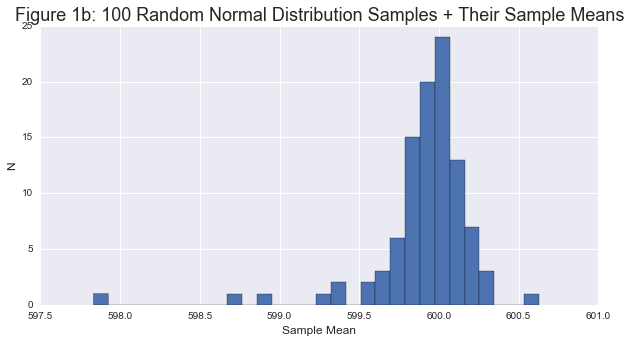

In [27]:
# md now is a dictionary with one object: an array by the key 'chisq'
pl.figure(figsize=(10,5))
pl.hist(listOfNormal, bins = 30)
pl.ylabel('N', fontsize=12)
pl.xlabel('Sample Mean', fontsize=12)
pl.title('Figure 1b: 100 Random Normal Distribution Samples + Their Sample Means', fontsize=18)

# Figure 1b
This histogram depicts aspects of the CLT, which is that the underlying distribution of a population distribution resembles that of a Normal Distribution and have a mean equal to the parent distribution. In this particular case, the Normal Distribution had a true mean of 600. 

[599.81295302251078, 600.10602370248773, 599.8635455541538, 599.95098097923426, 600.04163888989274, 599.96990363335806, 599.79588116312334, 599.85009113289914, 599.94878519044266, 599.8813851134156, 600.10246438672175, 599.9374260615316, 600.06295230929777, 599.91878718517273, 600.00083508970386, 600.07931676205237, 600.00818450972884, 600.00867712300897, 599.98026639049374, 599.98538890663588, 599.97513603788752, 600.01790727525747, 600.01719989452465, 599.97906746213016, 599.95179986176015, 599.97058245610981, 600.04221142012091, 600.10057944162941, 599.93965933018467, 600.02599931640111, 600.01616890514083, 599.98263572975543, 599.9886448128874, 600.02578889829465, 600.03104208048899, 599.94615904066166, 600.03941887817484, 600.05079800055603, 600.0136590938273, 599.97474239533835, 599.97390759692951, 599.97799604153522, 599.99478993150365, 600.01302346375473, 600.02178197839714, 600.01722305516898, 599.97404305981354, 600.03348704307689, 600.03531884477161, 599.98419694636357, 600.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


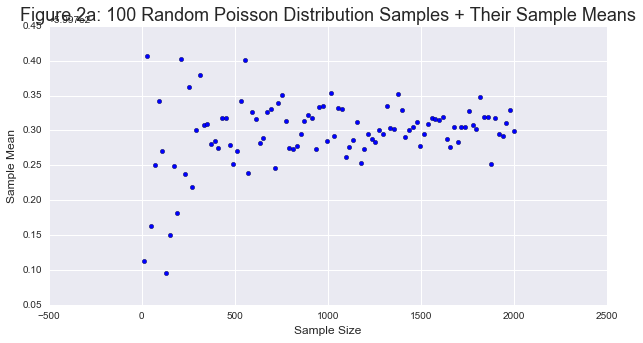

In [14]:
#Poisson Distribution
lam = myMean
#create a function which returns the mean of each randomly generated poisson distribution
def create_poisson_size(lam, s):
    return np.random.normal(lam, size = s).mean()

listOfPoisson = []
for n in np.linspace(10, 2000, 100):
    #draws samples from a normal distribution
    listOfPoisson.append(create_poisson_size(lam, n))
print(listOfPoisson)

indexOfValues = np.linspace(10, 2000, 100)
pl.figure(figsize(10,5))
pl.scatter(indexOfValues, listOfPoisson)
pl.title('Figure 2a: 100 Random Poisson Distribution Samples + Their Sample Means', fontsize=18)
pl.xlabel('Sample Size', fontsize=12)
pl.ylabel('Sample Mean', fontsize=12)

# Figure 2a
The plot above depicts the LLN, which says that as the sample of means increases,
the mean of those samples approaches the mean of the population. In this case, as the number
of samples increases, the mean approaches 600. This is a Poisson Distribution.

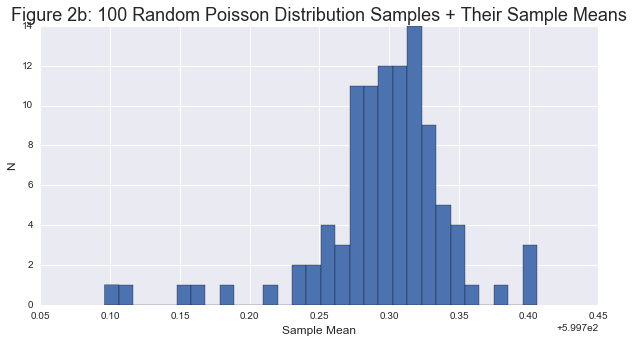

In [19]:
pl.figure(figsize(10,5))
pl.hist(listOfPoisson, bins = 30)
pl.title('Figure 2b: 100 Random Poisson Distribution Samples + Their Sample Means', fontsize=18)
pl.ylabel('N', fontsize=12)
pl.xlabel('Sample Mean', fontsize=12)

# Figure 2b
This histogram depicts aspects of the CLT, which is that the underlying distribution of a population distribution resembles that of a Normal Distribution and have a mean equal to the parent distribution. In this particular case, the Poisson Distribution had a true mean of 600. 

[599.39999999999998, 599.45000000000005, 599.54999999999995, 599.75, 600.34000000000003, 599.51999999999998, 598.38, 597.21000000000004, 599.40999999999997, 601.99000000000001, 599.02999999999997, 600.37, 600.78999999999996, 599.63, 600.75999999999999, 600.25999999999999, 602.0, 600.66999999999996, 600.80999999999995, 599.80999999999995, 599.89999999999998, 602.24000000000001, 598.78999999999996, 598.33000000000004, 598.40999999999997, 601.88999999999999, 598.89999999999998, 599.37, 597.87, 601.29999999999995, 602.66999999999996, 596.49000000000001, 598.40999999999997, 602.52999999999997, 596.98000000000002, 600.73000000000002, 598.72000000000003, 599.80999999999995, 599.50999999999999, 596.25999999999999, 599.08000000000004, 601.24000000000001, 597.32000000000005, 599.75, 598.84000000000003, 597.80999999999995, 600.63999999999999, 598.82000000000005, 598.30999999999995, 600.25999999999999, 599.00999999999999, 598.13, 598.70000000000005, 598.64999999999998, 598.19000000000005, 599.9099

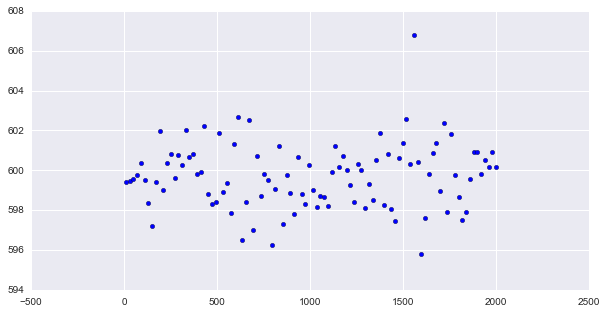

In [17]:
#Binomial Distribution
#double check this equation, because 's' shouldn't need to be defined prior to calling it
#also, this distribution is not following the Law of Large Numbers 
n = 1200
p = .5
s = 100
def create_binomial_size(n, p, s):
    return np.random.binomial(n, p, size = s).mean()

listOfBinomial = []
for i in np.linspace(10, 2000, 100):
    #draws samples from a chi-squared distribution
    listOfBinomial.append(create_binomial_size(n, p, s))
print(listOfBinomial)

indexOfValues = np.linspace(10, 2000, 100)
pl.figure()
pl.scatter(indexOfValues, listOfBinomial)

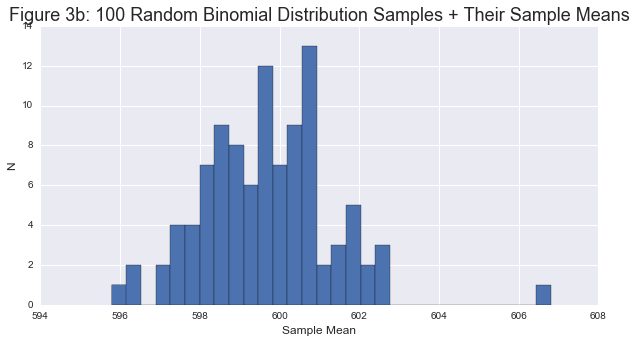

In [23]:
pl.figure(figsize=(10,5))
pl.hist(listOfBinomial, bins = 30)
pl.title('Figure 3b: 100 Random Binomial Distribution Samples + Their Sample Means', fontsize=18)
pl.ylabel('N', fontsize=12)
pl.xlabel('Sample Mean', fontsize=12)

# Figure 3b
This histogram depicts aspects of the CLT, which is that the underlying distribution of a population distribution resembles that of a Normal Distribution and have a mean equal to the parent distribution. In this particular case, the Binomial Distribution had a true mean of 600. 

[591.57546505334426, 608.94057373682745, 595.40131688698432, 604.59956601957902, 596.36816704528667, 596.47335000136218, 605.31270335761189, 603.79015943649108, 597.32064101671392, 601.37897728374469, 601.10196836334183, 601.07628862065212, 598.13882109563838, 600.33901299232991, 601.24257757724399, 600.36663285925772, 601.55033117431424, 598.62317015643521, 601.89019608127057, 600.26679015555283, 598.47101188666204, 601.0901711502031, 602.58283017452845, 595.95325368826036, 601.8015642182271, 599.15684202874036, 602.6252421625918, 601.17245347987841, 600.36226752413427, 601.32442085322725, 600.58839117421883, 601.97670497691865, 599.25858005717794, 599.90846760341856, 597.814375059849, 598.1895443373952, 598.49063484757721, 599.11665742201978, 600.46374472779667, 600.20789468118312, 601.18749740295277, 598.41404381142479, 598.24776105555247, 598.81923059792553, 599.61174228838104, 599.09382902891548, 601.9302652397912, 599.84595560116259, 596.69913890792043, 600.71622504796437, 598.85

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


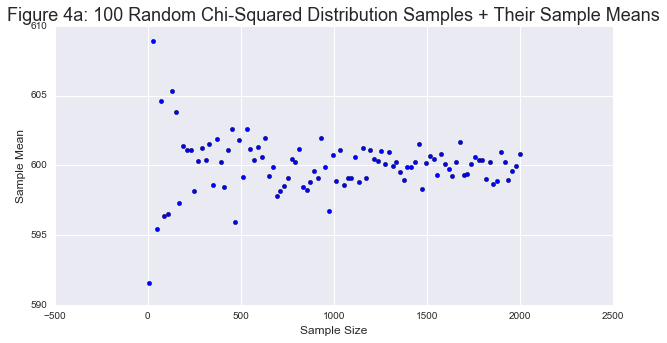

In [22]:
#Chi-Squared Distribution
df = myMean
#create a function which returns the mean of each randomly generated chi-squared distribution
def create_chisq_size(df, s):
    return np.random.chisquare(df, size = s).mean()

listOfChi = []
for n in np.linspace(10, 2000, 100):
    #draws samples from a chi-squared distribution
    listOfChi.append(create_chisq_size(df, n))
print(listOfChi)

indexOfValues = np.linspace(10, 2000, 100)
pl.figure(figsize=(10,5))
pl.scatter(indexOfValues, listOfChi)
pl.title('Figure 4a: 100 Random Chi-Squared Distribution Samples + Their Sample Means', fontsize=18)
pl.xlabel('Sample Size', fontsize=12)
pl.ylabel('Sample Mean', fontsize=12)

# Figure 4a
The plot above depicts the LLN, which says that as the sample of means increases,
the mean of those samples approaches the mean of the population. In this case, as the number
of samples increases, the mean approaches 600. This is a Chi-Squred Distribution.

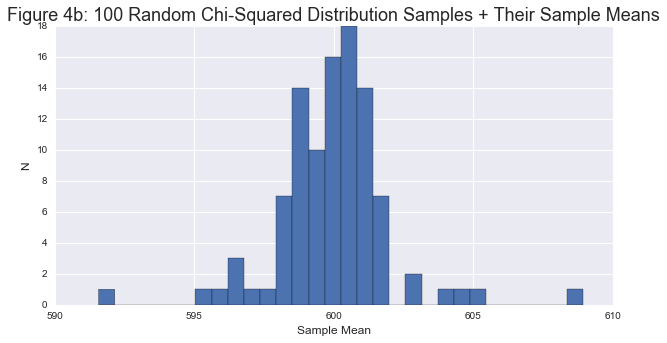

In [24]:
pl.figure(figsize(10,5))
pl.hist(listOfChi, bins = 30)
pl.ylabel('N', fontsize=12)
pl.xlabel('Sample Mean', fontsize=12)
pl.title('Figure 4b: 100 Random Chi-Squared Distribution Samples + Their Sample Means', fontsize=18)

# Figure 4b
This histogram depicts aspects of the CLT, which is that the underlying distribution of a population distribution resembles that of a Normal Distribution and have a mean equal to the parent distribution. In this particular case, the Chi-Squared Distribution had a true mean of 600. 

[529.81977076841247, 861.19571453542301, 802.50732578455313, 569.03317263475401, 504.24761862228286, 588.02628334455687, 619.32131487326114, 553.29322334766687, 565.54248985433162, 601.91302858441065, 655.53001207782154, 585.94165271291149, 560.81586933266237, 569.65398067169895, 667.91763805148639, 588.37861557519159, 556.47717469332849, 582.12108162572883, 594.02484150558155, 530.13582160065948, 639.76089064805149, 571.51313267454123, 655.78314996125789, 579.32621064072396, 555.95606422686274, 605.71420233409742, 572.90348662436179, 597.19709669075019, 594.6335020892451, 583.75945492303458, 616.65943368719684, 562.71115539983441, 562.43687125932524, 606.45434269578527, 666.61593174008749, 616.58476568278684, 592.32733289573389, 595.74731751152331, 605.62686518246699, 623.96993563518549, 583.94451917909657, 573.97782095737557, 571.37894966062549, 619.69548583893754, 590.23298779498543, 602.3518001475627, 617.20378038182866, 580.62781108606998, 617.0882898040976, 591.80391229527368, 60

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


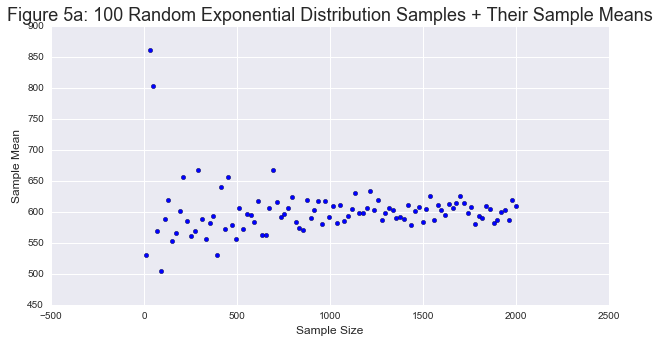

In [25]:
#Exponential Distribution
scale = myMean
#create a function which returns the mean of each randomly generated chi-squared distribution
def create_exponential_size(scale, s):
    return np.random.exponential(scale, size = s).mean()

listOfExponential = []
for n in np.linspace(10, 2000, 100):
    #draws samples from a chi-squared distribution
    listOfExponential.append(create_exponential_size(scale, n))
print(listOfExponential)

indexOfValues = np.linspace(10, 2000, 100)
pl.figure(figsize=(10,5))
pl.scatter(indexOfValues, listOfExponential)
pl.title('Figure 5a: 100 Random Exponential Distribution Samples + Their Sample Means', fontsize=18)
pl.xlabel('Sample Size', fontsize=12)
pl.ylabel('Sample Mean', fontsize=12)

# Figure 5a
The plot above depicts the LLN, which says that as the sample of means increases,
the mean of those samples approaches the mean of the population. In this case, as the number
of samples increases, the mean approaches 600. This is an Exponential Distribution.

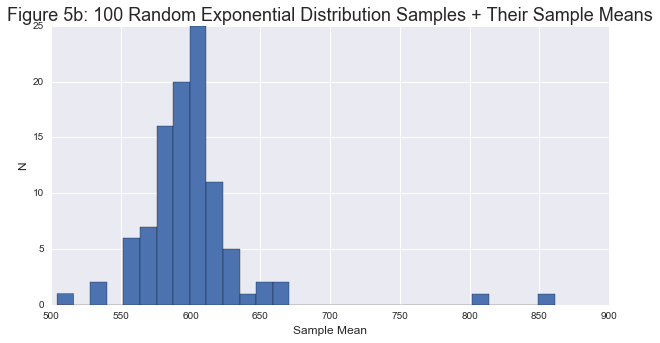

In [26]:
pl.figure(figsize=(10,5))
pl.hist(listOfExponential, bins = 30)
pl.ylabel('N',fontsize=12)
pl.xlabel('Sample Mean',fontsize=12)
pl.title('Figure 5b: 100 Random Exponential Distribution Samples + Their Sample Means', fontsize=18)

# Figure 5b
This histogram depicts aspects of the CLT, which is that the underlying distribution of a population distribution resembles that of a Normal Distribution and have a mean equal to the parent distribution. In this particular case, the Exponential Distribution had a true mean of 600. 